## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

###1. Import and set and Tensorflow 2 and verify version

In [1]:
%tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [3]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


###3. Create a list 'class_names' of below Class Names
**Class - Class Name** ==> 
0 - T-shirt, 
1 - Trouser, 
2 - Pullover, 
3 - Dress, 
4 - Coat, 
5 - Sandal, 
6 - Shirt, 
7 - Sneaker, 
8 - Bag, 
9 - Ankle boot,

In [0]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

###4. Find no.of samples in training and test dataset

In [5]:
print('Number of samples in training set: ', x_train.shape[0])
print('Number of samples in test set: ', x_test.shape[0])

Number of samples in training set:  60000
Number of samples in test set:  10000


###5. Find dimensions of an image in the dataset

In [6]:
print('Dimensions of samples in training set: ', x_train.shape[1:])
print('Dimensions of samples in test set: ', x_test.shape[1:])

Dimensions of samples in training set:  (28, 28)
Dimensions of samples in test set:  (28, 28)


### 6. Verify if existing labels/Classes are correct 

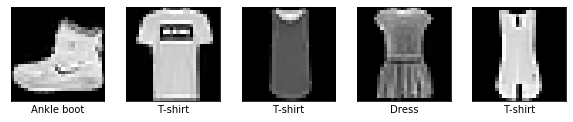

In [7]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

### 7. Convert train and test labels to one hot vectors

** check `tensorflow.keras.utils.to_categorical()` **

In [0]:
y_train_tf = tf.keras.utils.to_categorical(y_train)
y_test_tf = tf.keras.utils.to_categorical(y_test)

In [9]:
y_train_tf[2] # T-shirt --> 0

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

###8. Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train_norm = (x_train/255)
x_test_norm = (x_test/255)

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

###9. Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras
check `tensorflow.keras.backend.expand_dims`


In [0]:
# We can reshape using expand dims
x_train_with_dims = tf.keras.backend.expand_dims(x_train_norm,axis=-1)
x_test_with_dims = tf.keras.backend.expand_dims(x_test_norm,axis=-1)

In [0]:
# or we can follow the below approach

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
# model.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

###10. Import the necessary layers from keras to build the model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import MaxPool2D


### 11. Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with no.of `epochs=10`. **

In [0]:
#Initialize Sequential model
model = Sequential()

#normalize data
model.add(BatchNormalization())

#Add first convolutional layer
model.add(Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model.add(Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Flatten the output
model.add(Flatten())

#Dense layer
model.add(Dense(128, activation='relu'))

#Add another dropout layer
model.add(Dropout(0.25))

#Output layer
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(x_train_with_dims,tf.convert_to_tensor(y_train_tf),          
          validation_data=(x_test_with_dims,tf.convert_to_tensor(y_test_tf)),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 179us/sample - loss: 0.4050 - accuracy: 0.8554 - val_loss: 0.2988 - val_accuracy: 0.8870
Epoch 2/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.2540 - accuracy: 0.9072 - val_loss: 0.2642 - val_accuracy: 0.9046
Epoch 3/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.1892 - accuracy: 0.9291 - val_loss: 0.2560 - val_accuracy: 0.9103
Epoch 4/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.1451 - accuracy: 0.9462 - val_loss: 0.2779 - val_accuracy: 0.9131
Epoch 5/10
60000/60000 [==============================] - 9s 146us/sample - loss: 0.1114 - accuracy: 0.9579 - val_loss: 0.2999 - val_accuracy: 0.9124
Epoch 6/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.0871 - accuracy: 0.9674 - val_loss: 0.3190 - val_accuracy: 0.9147
Epoch 7/10
60000/60000 [=========================

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo multiple                  4         
_________________________________________________________________
conv2d (Conv2D)              multiple                  320       
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  9248      
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  2359424   
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  1

###12. Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
#Initialize Sequential model
model2 = Sequential()

#normalize data
model2.add(BatchNormalization())

#Add first convolutional layer
model2.add(Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model2.add(Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add MaxPooling layer
model2.add(MaxPool2D(pool_size=(2,2)))

#Flatten the output
model2.add(Flatten())

#Dense layer
model2.add(Dense(128, activation='relu'))

#Add another dropout layer
model2.add(Dropout(0.25))

#Output layer
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
#Train the model
model2.fit(x_train_with_dims, tf.convert_to_tensor(y_train_tf),          
          validation_data=(x_test_with_dims, tf.convert_to_tensor(y_test_tf)),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 152us/sample - loss: 0.3850 - accuracy: 0.8623 - val_loss: 0.2777 - val_accuracy: 0.8962
Epoch 2/10
60000/60000 [==============================] - 9s 142us/sample - loss: 0.2463 - accuracy: 0.9103 - val_loss: 0.2392 - val_accuracy: 0.9100
Epoch 3/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.1995 - accuracy: 0.9270 - val_loss: 0.2318 - val_accuracy: 0.9167
Epoch 4/10
60000/60000 [==============================] - 9s 143us/sample - loss: 0.1659 - accuracy: 0.9385 - val_loss: 0.2233 - val_accuracy: 0.9206
Epoch 5/10
60000/60000 [==============================] - 8s 142us/sample - loss: 0.1423 - accuracy: 0.9475 - val_loss: 0.2362 - val_accuracy: 0.9215
Epoch 6/10
60000/60000 [==============================] - 9s 144us/sample - loss: 0.1189 - accuracy: 0.9559 - val_loss: 0.2575 - val_accuracy: 0.9224
Epoch 7/10
60000/60000 [==========================

In [20]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch multiple                  4         
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  320       
_________________________________________________________________
conv2d_3 (Conv2D)            multiple                  9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  589952    
_________________________________________________________________
dropout_1 (Dropout)          multiple                 

###13. Verify accuracy of the model

> 

In [21]:
model.evaluate(x_test_with_dims, tf.convert_to_tensor(y_test_tf))
model2.evaluate(x_test_with_dims, tf.convert_to_tensor(y_test_tf))

10000/10000 [==============================] - 1s 93us/sample - loss: 0.2941 - accuracy: 0.9239


[0.2941040391534567, 0.9239]

####14. Verify performance of your model selectively 

In [0]:
predictions = model2.predict(x_train_with_dims)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color='green')

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(9), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='blue')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

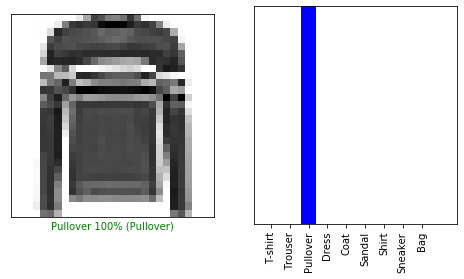

In [25]:
#Replace value of i with other index to check other product
i = 5
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_train, x_train)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_train)
plt.show()

### Now, to the above model, lets add Data Augmentation 

###15. Import the ImageDataGenrator from keras and fit the training images

In [0]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True)

In [0]:
datagen.fit(x_train_with_dims)

####16. Showing 5 versions of the first image in training dataset using image datagenerator.flow()

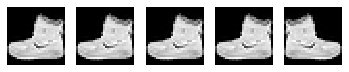

In [29]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_with_dims[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()